# Homework 1 - Report


## 3 - Research Questions

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#import input and output files
#input
input_file = 'C:\\Users\\hanne\\Documents\\Erasmus\\IE582\\hw1\\hw1_input.csv'
input = np.loadtxt(input_file, delimiter=',', skiprows=1)
input_df = pd.read_csv(input_file)
#output real
output_real_file = 'C:\\Users\\hanne\\Documents\\Erasmus\\IE582\\hw1\\hw1_real.csv'
output_real = np.loadtxt(output_real_file, delimiter=',', skiprows=1)
#output imaginary
output_img_file = 'C:\\Users\\hanne\\Documents\\Erasmus\\IE582\\hw1\\hw1_img.csv'
output_img = np.loadtxt(output_img_file, delimiter=',', skiprows=1)

In [11]:
#calculate the s11 magnitude
s11_magnitude = (output_real**2 + output_img**2)**0.5

#calculate magnitude in db
s11_db = 20*np.log10(s11_magnitude)

### 3.1 Dimensionality Reduction with PCA

To reduce the complexicity of the design space through PCA, the PCA function is imported and used on the scaled input data.

The standard deviation, explained varaince and cumulative variance of each Component is printed. After that, the number of principal components used is set to nine, as the cumulative explained variance reaches 0.9 for nine principal components. The loadings are presented in a table.

In [12]:
#import tools for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [51]:
#import Scaler for standardization
scaler = StandardScaler()

#PCA on input

input_scaled = scaler.fit_transform(input)

#PCA

pca = PCA()
principal_comp = pca.fit_transform(input_scaled)

principal_comp_var = pca.explained_variance_ratio_
principal_comp_var_cum = np.cumsum(principal_comp_var)
principal_comp_std = np.std(principal_comp, axis=0) 

principal_comp_info = pd.DataFrame([principal_comp_std, principal_comp_var, principal_comp_var_cum],index=['Standard Deviation','Porportion of Variance','Cumulative Proportion'],columns=[f'PC {i+1}' for i in range(len(input_scaled[0]))])
principal_comp_info

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11
Standard Deviation,1.509532,1.103536,1.048986,1.028006,1.005275,0.986428,0.970695,0.947711,0.898546,0.800831,0.271318
Porportion of Variance,0.207153,0.110708,0.100034,0.096072,0.091871,0.088458,0.085659,0.081651,0.073399,0.058303,0.006692
Cumulative Proportion,0.207153,0.317862,0.417896,0.513968,0.605839,0.694297,0.779956,0.861607,0.935005,0.993308,1.000000


In [48]:
n_comp = 9
# Get the loadings (components of the eigenvectors)
loadings = pd.DataFrame(pca.components_[:n_comp].T, index=input_df.columns, columns=[f'PC{i+1}' for i in range(len(pca.components_[:n_comp]))])
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
length of patch,-0.101327,-0.315409,-0.369645,0.376883,-0.409833,0.073314,-0.253331,-0.454266,-0.406238
width of patch,0.624178,0.009718,0.040766,0.039631,-0.012169,-0.032326,0.000413,-0.022090,-0.040157
height of patch,0.071054,-0.055716,0.620460,0.392974,-0.017701,0.069714,-0.490098,0.317943,-0.216559
height of substrate,0.624137,-0.018824,0.016441,0.076518,-0.028012,-0.060565,0.002837,-0.059481,-0.038186
height of solder resist layer,-0.021049,-0.266259,0.086417,0.510652,0.124629,0.459841,0.647199,0.110408,0.040184
radius of the probe,0.025997,-0.002815,0.548381,-0.454397,-0.218986,0.304908,0.212779,-0.491478,-0.240280
c_pad,-0.054228,0.265990,0.144827,0.177533,-0.580059,-0.547579,0.429976,0.174386,-0.140321
c_antipad,-0.018720,0.559499,0.088323,0.373926,-0.127759,0.172140,-0.138146,-0.415883,0.548589
c_probe,0.039213,-0.564753,0.093131,-0.151004,-0.487544,0.016285,-0.102528,0.129279,0.618694
dielectric constant of substrate,0.445100,0.012829,-0.256167,-0.022492,-0.012254,0.027772,0.097290,-0.053226,0.031927


The complexicity could be reduced from 11 to 9 through PCA. These 9 principal components explain 93.5 % of the total variance in the design parameter space.

#### Insights from PCA

**PC1:** Width of Patch (0.624), Heigth of Substrate (0.624) and the Dielectric constant of substrate (0.445) all have a high positive loading values. That allows the conclusion that variation of these three parameters in general have a strong influence on the S11 magnitude of the antenna.
With width and heigth included, it seems as if PC1 decribes a variability that is caused by the dimension/size of the antenna, as well as the substrate material (dielectric constant) and size (height).

**PC2:** The highest loadings for PC2 are from c_antipad (0.559) and c_probe (-0.565). The difference in signs (c_antipad positive, c_probe negative) means that they influence PC2 in different directions, but at a similar absolute value. It can be concluded that c_antipad and c_probe influence the S11 magnitude value in opposite directions. PC2 describes the balance between these two parameters.

**PC3:** PC3's highest loadings come from height of patch (0.62), radius of the probe (0.548) and length of patch (-0.37). Height of patch and radius of the probe both impact PC3 positively, length of patch negatively. The dielectric constants of substrate and solder resist layer also influence this PC significantly (both around -0.25). PC3 is balancing positiviley influencing geometric parameters (heigth and radius) with negatively influencing material parameters (dielectric constants).

**PC4:** Balancing Height of solder resist (+) and probe radius (-). Solder resist thickness might decrease perfomance while probe radius improves it.

**PC5:** c_pad, c_probe, dielectric layer of solder resist all negatively influence PC5 in the same direction

**PC6:** height of solder resist (+), c_pad (-) and dielectr const of solder resist (+)

**PC7:** height of patch (-), height of solder resist layer (+) and c_pad (+)

**PC8:** length of patch (-), radius of the probe (-) and dielectric constant of solder resist layer (+)

**PC9:** c_antipad (+) and c_probe (+)


### 3.2 Regression Modeling for S11


First, we have to find key frequencies at which we can perform the linear regression. For that, the k lowest S11 magnitudes of the whole output and their respective frequencies are identified. Each of the output arrays (real, imaginary, magnitude) is reduced to just the columns of these specific frequencies, resulting in arrays of shape (385,k).

In [15]:
import statsmodels.api as sm

In [ ]:
min_each_row = np.min(s11_magnitude, axis=1)
min_idx_each_row = np.argmin(s11_magnitude, axis=1)

num_frequencies = 9
# Get indices of the k lowest magnitudes and their corresponding column indices
min_idx_lowest = np.argsort(min_each_row)[:num_frequencies]
frequencies = 
lowest = [(i, min_idx_each_row[i], min_each_row[i]) for i in min_idx_lowest]

## Print lowest S11 magnitudes, their design (row), and frequency (column)
for row_index, col_index, value in lowest:
    print(f'The lowest S11 magnitude for design {row_index} is {value:.4f} at frequency level {col_index}')

# Prepare output for regression with reduced matrix for selected frequencies
s11_magnitude_reduced = s11_magnitude[:, min_idx_each_row[min_idx_lowest]]
output_real_reduced = output_real[:, min_idx_each_row[min_idx_lowest]]
output_img_reduced = output_img[:, min_idx_each_row[min_idx_lowest]]

The lowest S11 magnitude for design 138 is 0.0056 at frequency level 71
The lowest S11 magnitude for design 16 is 0.0083 at frequency level 28
The lowest S11 magnitude for design 26 is 0.0106 at frequency level 27
The lowest S11 magnitude for design 276 is 0.0129 at frequency level 126
The lowest S11 magnitude for design 129 is 0.0160 at frequency level 155
The lowest S11 magnitude for design 92 is 0.0176 at frequency level 85
The lowest S11 magnitude for design 371 is 0.0181 at frequency level 88
The lowest S11 magnitude for design 342 is 0.0185 at frequency level 55
The lowest S11 magnitude for design 176 is 0.0196 at frequency level 172


In [184]:
frequencies = [min_idx_each_row[i] for i in min_idx_lowest]
frequencies

[71, 28, 27, 126, 155, 85, 88, 55, 172]

In [157]:
input_with_intercept = sm.add_constant(input_df).rename(columns={'const':'intercept'})

pred_result_real = []
summaries_real = []
rsquared_real = []
mse_real = []

pred_result_img = []
summaries_img = []
rsquared_img = []
mse_img = []

for i in range(len(output_real_reduced[0])):
    model_real = sm.OLS(output_real_reduced[:,i],input_with_intercept)
    result_real = model_real.fit()
    pred_real = result_real.predict(input_with_intercept)

    pred_result_real.append(pred_real)
    rsquared_real.append(result_real.rsquared)
    summaries_real.append(result_real.summary())
    mse_real.append(result_real.mse_model)

    model_img = sm.OLS(output_img_reduced[:,i],input_with_intercept)
    result_img = model_img.fit()
    pred_img = result_img.predict(input_with_intercept)

    pred_result_img.append(pred_img)
    rsquared_img.append(result_img.rsquared)
    summaries_img.append(result_img.summary())
    mse_img.append(result_img.mse_model)


    

In [61]:
mse_real

[12.253826731487358,
 16.660658460310632,
 16.76336515411238,
 10.899235418556243,
 11.241830334522428,
 11.85619190341813,
 11.685757836764742,
 13.709465637169966,
 11.420415787262018]

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [192]:


# Initialize dictionaries to store results for each output
results = {
    'output_real': {'r_squared': [], 'mse': [], 'coefficients': []},
    'output_img': {'r_squared': [], 'mse': [], 'coefficients': []}
}

pred_real = []
pred_img = []

in_train, in_test, out_real_train, out_real_test, out_img_train, out_img_test = train_test_split(input_df, output_real_reduced, output_img_reduced, test_size=0.2, random_state=42)

for i in range(len(output_real_reduced[0])):
    #in_train, in_test, out_real_train, out_real_test, out_img_train, out_img_test = train_test_split(input_df, output_real_reduced[:,i], output_img_reduced[:,i], test_size=0.2, random_state=42)

    model_real = LinearRegression(fit_intercept=True)
    model_img = LinearRegression(fit_intercept=True)
    
    #fit regression model - real
    model_real.fit(in_train, out_real_train[:,i])
    out_real_pred = model_real.predict(in_test)

    mse_real = mean_squared_error(out_real_test[:,i], out_real_pred)
    r2_real = r2_score(out_real_test[:,i], out_real_pred)

    #fit regression model - img
    model_img.fit(in_train, out_img_train[:,i])
    out_img_pred = model_img.predict(in_test)

    mse_img = mean_squared_error(out_img_test[:,i], out_img_pred)
    r2_img = r2_score(out_img_test[:,i], out_img_pred)

    pred_real.append(out_real_pred)
    pred_img.append(out_img_pred)
    results['output_real']['r_squared'].append(r2_real)
    results['output_real']['mse'].append(mse_real)
    #results['output_real']['coefficients'].append(coefficients_real)
    results['output_img']['r_squared'].append(r2_img)
    results['output_img']['mse'].append(mse_img)
    #results['output_img']['coefficients'].append(coefficients_real)

results['output_real']['r_squared']

[0.8220131887483644,
 0.8737386048918218,
 0.8743885433589881,
 0.7936228572132201,
 0.8157979108499123,
 0.8757819566695508,
 0.8744063889246042,
 0.8408291992291774,
 0.7926742925200861]

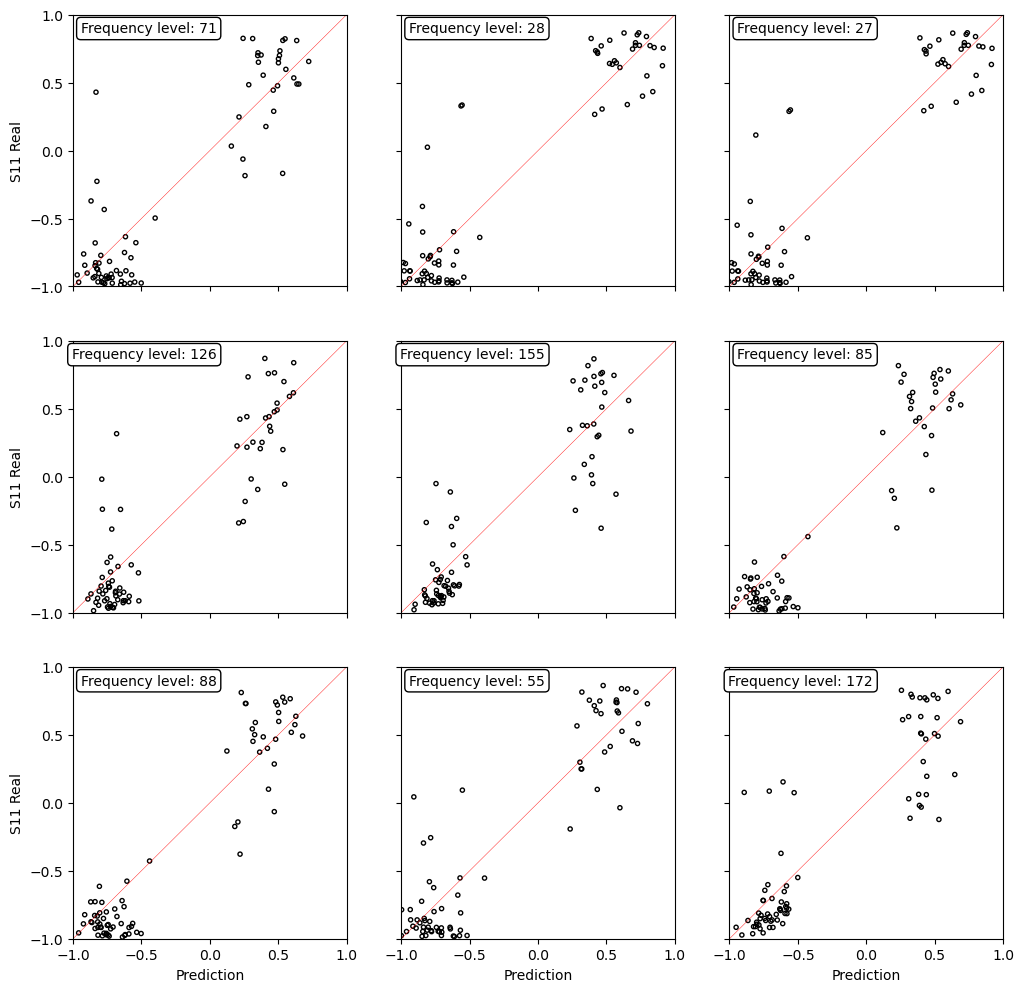

In [ ]:
#Real

fig, axs = plt.subplots(3, 3,figsize=(12,12))

#scatter-plot output value over predicted values
for i,ax in enumerate(axs.flat):
    if(i>=len(output_real_reduced[0])):
        break
    ax.scatter(pred_real[i],out_real_test[:,i],color='black',marker='.',facecolors='none')
    ax.axline((0, 0), slope=1,color='red',linewidth=0.3)
    ax.text(0.05, 0.95, f'Frequency level: {frequencies[i]}',
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
# set axis properties
for ax in axs.flat:
    ax.set(xlabel='Prediction', ylabel='S11 Real')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    ax.set_yticks(np.arange(-1, 1.1, 0.5))
    ax.label_outer()

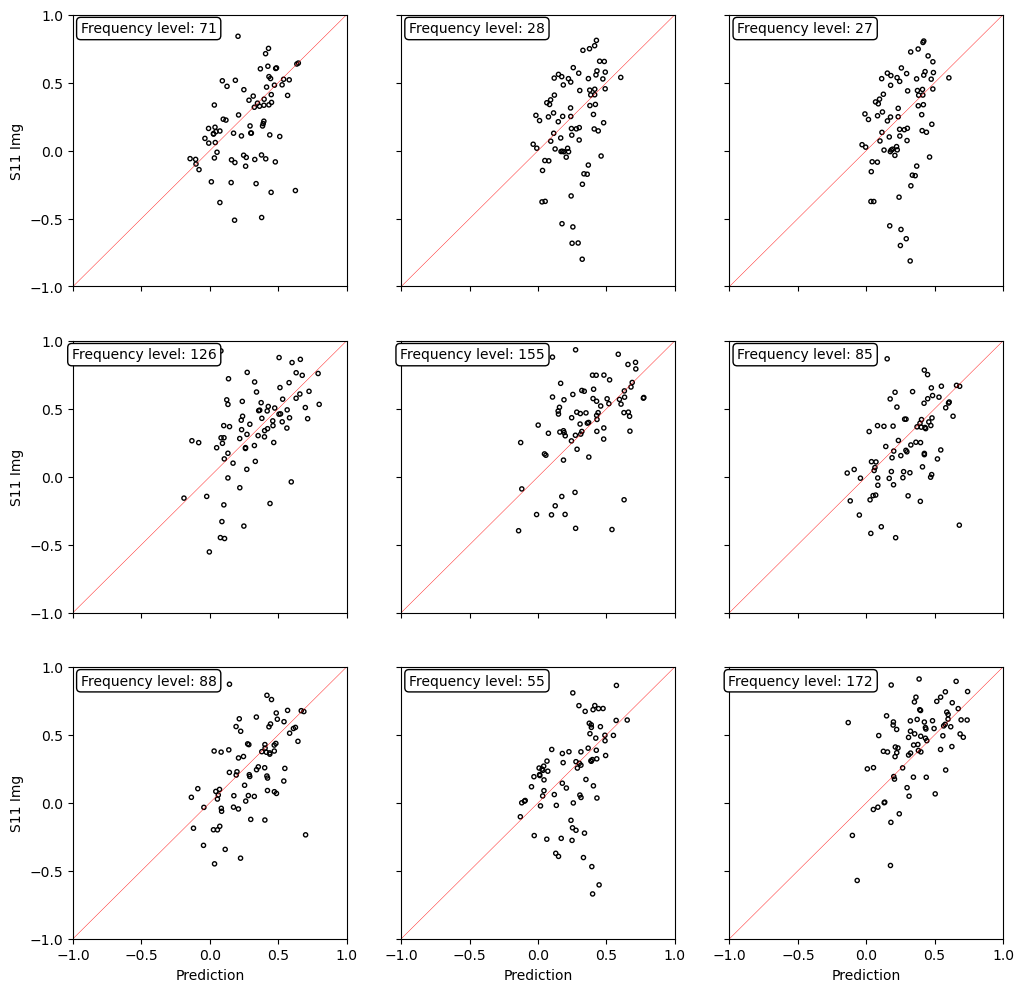

In [191]:
#Imaginary

fig, axs = plt.subplots(3, 3,figsize=(12,12))

#scatter-plot output value over predicted values
for i,ax in enumerate(axs.flat):
    if(i>=len(output_img_reduced[0])):
        break
    ax.scatter(pred_img[i],out_img_test[:,i],color='black',marker='.',facecolors='none')
    ax.axline((0, 0), slope=1,color='red',linewidth=0.3)
    ax.text(0.05, 0.95, f'Frequency level: {frequencies[i]}',
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    

# set axis properties
for ax in axs.flat:
    ax.set(xlabel='Prediction', ylabel='S11 Img')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    ax.set_yticks(np.arange(-1, 1.1, 0.5))
    ax.label_outer()

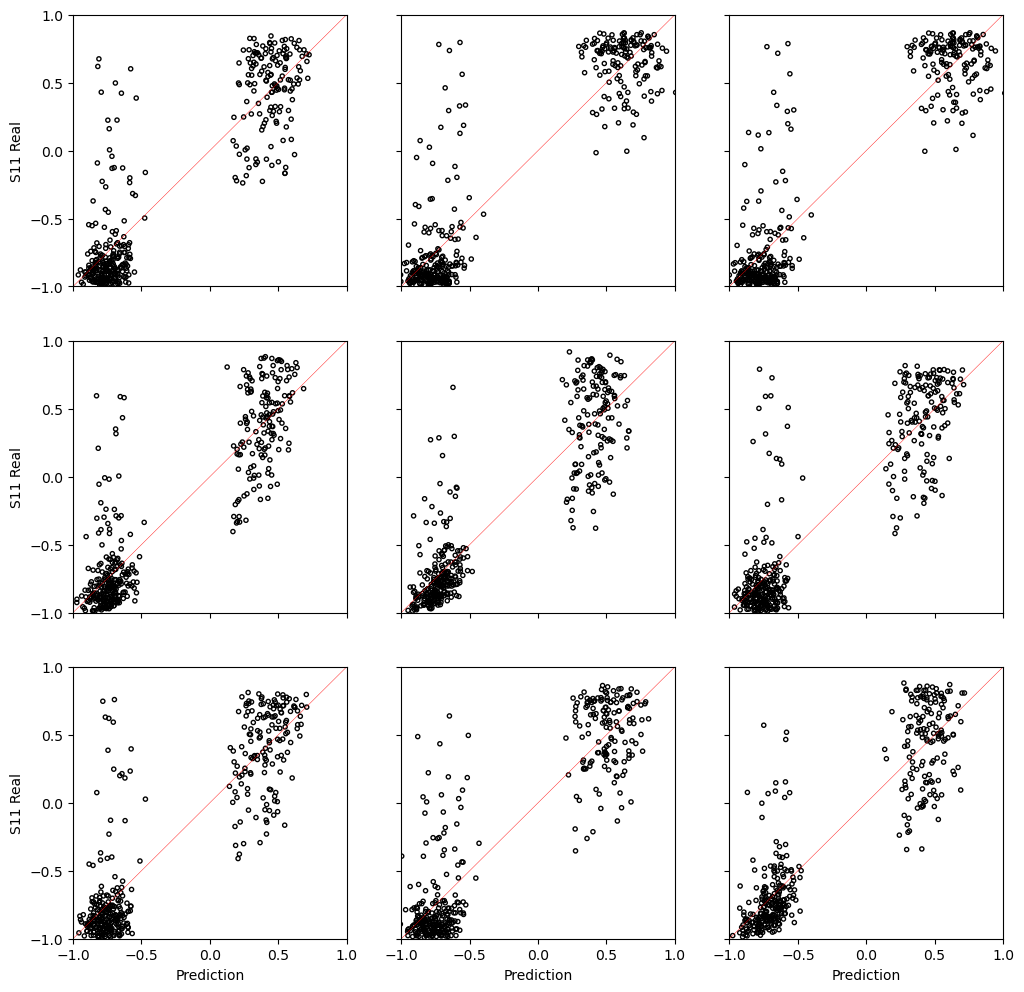

In [ ]:
#Real - old regression, no train-test-split

fig, axs = plt.subplots(3, 3,figsize=(12,12))

#scatter-plot output value over predicted values
for i,ax in enumerate(axs.flat):
    if(i>=len(output_real_reduced[0])):
        break
    ax.scatter(pred_result_real[i],output_real_reduced[:,i],color='black',marker='.',facecolors='none')
    ax.axline((0, 0), slope=1,color='red',linewidth=0.3)
    
# set axis properties
for ax in axs.flat:
    ax.set(xlabel='Prediction', ylabel='S11 Real')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    ax.set_yticks(np.arange(-1, 1.1, 0.5))
    ax.label_outer()

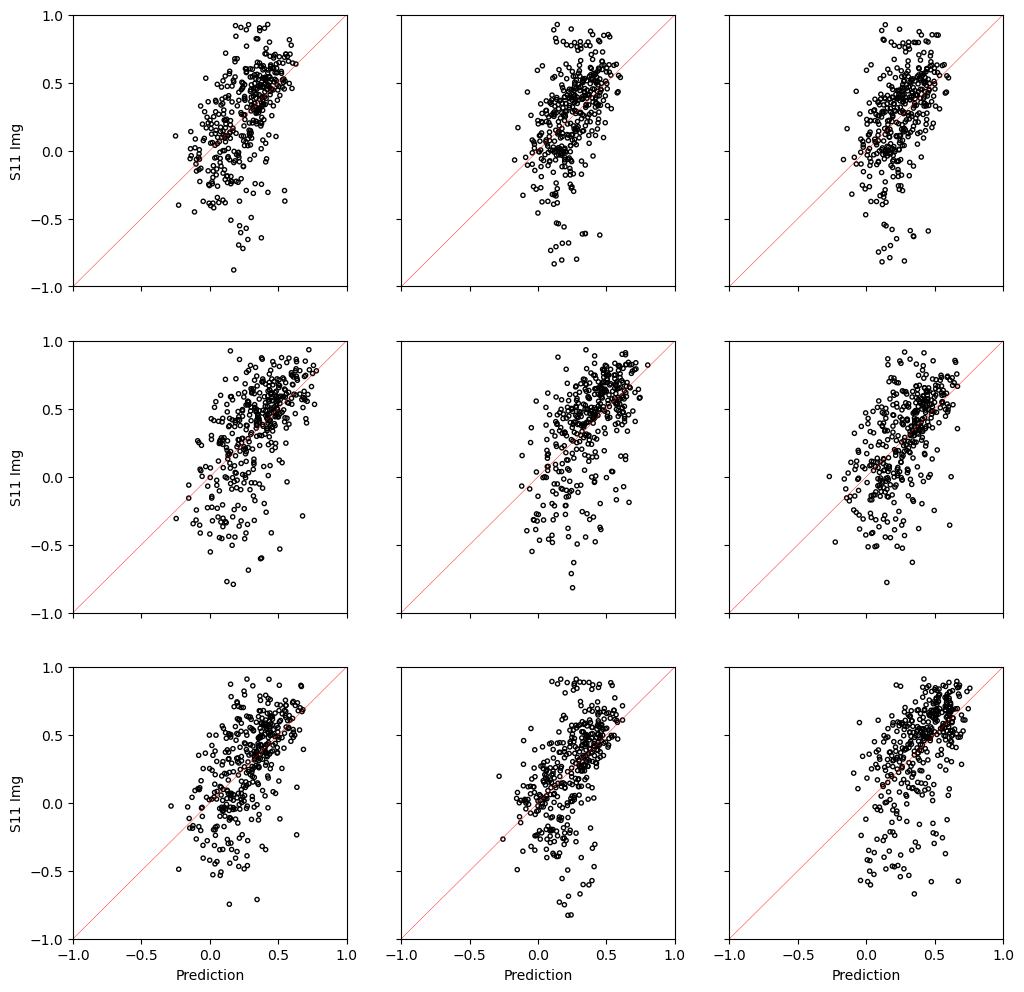

In [ ]:
#Imaginary - old regression, no train-test-split

fig, axs = plt.subplots(3, 3,figsize=(12,12))

#scatter-plot output value over predicted values
for i,ax in enumerate(axs.flat):
    if(i>=len(output_img_reduced[0])):
        break
    ax.scatter(pred_result_img[i],output_img_reduced[:,i],color='black',marker='.',facecolors='none')
    ax.axline((0, 0), slope=1,color='red',linewidth=0.3)
    

# set axis properties
for ax in axs.flat:
    ax.set(xlabel='Prediction', ylabel='S11 Img')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    ax.set_yticks(np.arange(-1, 1.1, 0.5))
    ax.label_outer()